The Book class encapsulates book attributes (date, title, genre, type, rating, price, average reading time) and generates a unique ID for each instance, with a readable string representation.

In [ ]:
class Book:
    def __init__(self, date, title, genre, book_type, rating, price, average_reading_time):
        self.date = date
        self.title = title
        self.genre = genre
        self.type = book_type
        self.rating = rating
        self.price = price
        self.average_reading_time = average_reading_time
        self.unique_id = id(self)

    def __str__(self):
        return f"{self.unique_id},{self.date},{self.title},{self.genre},{self.type},{self.rating},{self.price},{self.average_reading_time}"


The FictionBook and NonFictionBook classes inherit from the Book class, adding specific book types ('Fiction' and 'Non-Fiction') while retaining common attributes like date, title, genre, rating, price, and average reading time.

In [ ]:
class FictionBook(Book):
    def __init__(self, date, title, genre, rating, price, average_reading_time):
        super().__init__(date, title, genre, "Fiction", rating, price, average_reading_time)


class NonFictionBook(Book):
    def __init__(self, date, title, genre, rating, price, average_reading_time):
        super().__init__(date, title, genre, "Non-Fiction", rating, price, average_reading_time)


The MysteryBook, ScienceBook, and BiographyBook classes inherit from FictionBook and NonFictionBook, respectively, further specifying book types ('MysteryBook', 'ScienceBook', and 'BiographyBook') while preserving common attributes like date, title, rating, price, and average reading time.

In [ ]:
class MysteryBook(FictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        super().__init__(date, title, "MysteryBook", rating, price, average_reading_time)


class ScienceBook(NonFictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        super().__init__(date, title, "ScienceBook", rating, price, average_reading_time)


class BiographyBook(NonFictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        super().__init__(date, title, "BiographyBook", rating, price, average_reading_time)


Code to check if __str__() function works as expected.

In [ ]:
ScienceBookBook = ScienceBook("2022-10-16", "The Selfish Gene", 3.0, 69.19, 38.00)
print(str(ScienceBookBook))


132705506033184,2022-10-16,The Selfish Gene,ScienceBook,Non-Fiction,3.0,69.19,38.0


The pandas library is used for data manipulation and analysis, while matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python. The seaborn seaborn library provides a high-level interface for drawing statistical graphics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Note: Before executing the next cell, please import the library_data.dat by clicking on files and uploading it (It was provided in the zipped file).**

This code under is used to decrypt the data objects and save them as a csv.

In [ ]:
import pickle

# Load pickle file
with open('/content/library_data.dat', 'rb') as file:
    objects = pickle.load(file)

# Write data to CSV
with open('data.csv', 'w') as f:
    f.write("unique_id,date,title,genre,type,rating,price,average_reading_time\n")
    for obj in objects:
        f.write(str(obj) + '\n')

 **Data Description:**

**Size and Structure:**

The dataset contains 10,000 records with 8 columns, including both categorical and numerical data.

**Content:**

It tracks library books or resources, featuring details like title, genre, type (e.g., Fiction/Non-Fiction), and average_reading_time.

**Missing Values:**

Columns such as date, rating, price, and average_reading_time have incomplete data, requiring imputation or cleanup.

**Numerical Features:**

Key numerical attributes include rating (book quality), price (cost), and average_reading_time (reading duration).

**Categorical Features:**

Genres (e.g., BiographyBook, ScienceBook) and types classify resources, while a unique ID column ensures record tracking.

In [ ]:
# Load CSV into DataFrame
data = pd.read_csv('data.csv')

data.describe() provides a summary of the statistics of the numerical columns in the DataFrame data

In [ ]:
data.describe()

,unique_id,rating,price,average_reading_time
count,1.000000e+04,9604.000000,9165.000000,9165.000000
mean,1.352469e+14,2.992191,61.650300,28.970702
std,1.870444e+08,1.071067,5.688155,4.824193
min,1.352469e+14,1.000000,40.000000,19.000000
25%,1.352469e+14,2.000000,58.000000,25.290000
50%,1.352469e+14,3.000000,63.000000,28.940000
75%,1.352469e+14,4.000000,66.000000,32.690000
max,1.352481e+14,5.000000,69.000000,39.000000


data.head() returns the first 5 rows of the DataFrame data, allowing you to quickly inspect the top entries in the dataset.

In [ ]:
data.head()

,unique_id,date,title,genre,type,rating,price,average_reading_time
0,135248136256576,2022-04-29,Malcolm X,BiographyBook,Non-Fiction,3.0,66.0,24.20
1,135247787274112,NaN,Malcolm X,BiographyBook,Non-Fiction,3.0,65.0,35.72
2,135247787270944,2022-01-30,The Selfish Gene,ScienceBook,Non-Fiction,5.0,60.0,27.62
3,135247787272336,2022-05-22,Malcolm X,BiographyBook,Non-Fiction,5.0,56.0,26.83
4,135247787274160,2022-03-10,The Diary of a Young Girl,BiographyBook,Non-Fiction,3.0,62.0,32.36


data.info() provides a concise summary of the DataFrame data, including the number of entries (rows), the number of non-null values in each column, the data type of each column, and the memory usage.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             10000 non-null  int64  
 1   date                  9589 non-null   object 
 2   title                 10000 non-null  object 
 3   genre                 10000 non-null  object 
 4   type                  10000 non-null  object 
 5   rating                9604 non-null   float64
 6   price                 9165 non-null   float64
 7   average_reading_time  9165 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


**Handling Missing Values**

**Date:**

Missing values could be replaced with a placeholder like "Unknown" or an imputed approximate date based on trends.

**Rating:**

Replace missing values with the median rating, as it is less sensitive to outliers.

**Price:**

Use the median price within the same genre or type to fill missing values.

**Average Reading Time:**

Impute with the mean or median based on the type of resource.

In [ ]:
# Ensure proper handling of missing values
data['date'] = pd.to_datetime(data['date'], errors='coerce')



**1. Bar Chart: Count of entries by genre**

---

*   The data tells us that the library is mostly filled with Biography books. Followed by ScienceBooks as they account for a 4th of Biography books. Finally less than 250 books belong to Mystery (Non-Fiction) books.

**Imbalance in Genres**
* The library heavily favors BiographyBook, while MysteryBook is underrepresented.
* ScienceBook occupies a middle ground, indicating moderate attention.


**Insights for Library Management**
*	The library's focus on BiographyBook may reflect user demand or collection priorities.
*Adding more entries in genres like MysteryBook could diversify the catalog

**User Preferences**
* The dominance of BiographyBook suggests a high interest in non-fiction or biographical content.
* MysteryBook might cater to a niche audience or require promotion to gain traction.




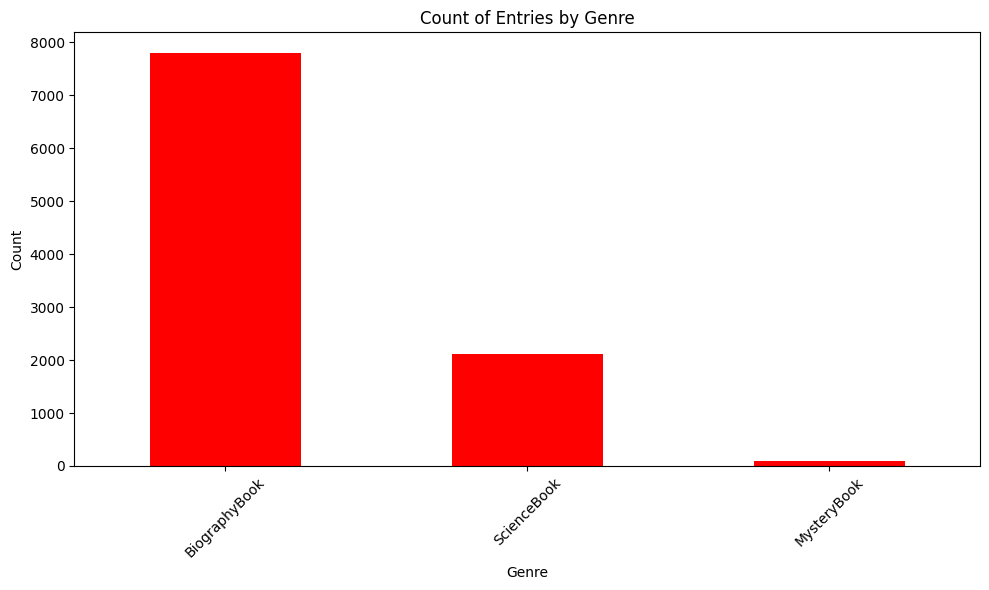

In [ ]:
plt.figure(figsize=(10, 6))
data['genre'].value_counts().plot(kind='bar', color='red')
plt.title('Count of Entries by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Boxplot: Distribution of prices by genre**


---

**Median Prices**
*	The horizontal line inside each box represents the median price for that genre.
*	BiographyBook has the highest median price, while ScienceBook and MysteryBook are slightly lower.

**Interquartile Range (IQR)**
*	The height of each box shows the IQR, indicating price variability within the middle 50% of data.
*	BiographyBook has a larger IQR, suggesting more variability in its prices compared to the other genres.

**Minimum and Maximum Prices**
*	The whiskers (lines extending from the box) represent the minimum and maximum prices, excluding outliers.
*	All genres have similar lower limits (~$45), but the upper limits vary slightly.

**Genre Comparison**
*	Prices for BiographyBook are generally higher and more variable.
*	MysteryBook and ScienceBook have similar distributions, indicating comparable price ranges.

**Insights for Library Management**
*	BiographyBook pricing may cater to a niche or premium audience.
*	MysteryBook and ScienceBook could appeal to cost-conscious readers.




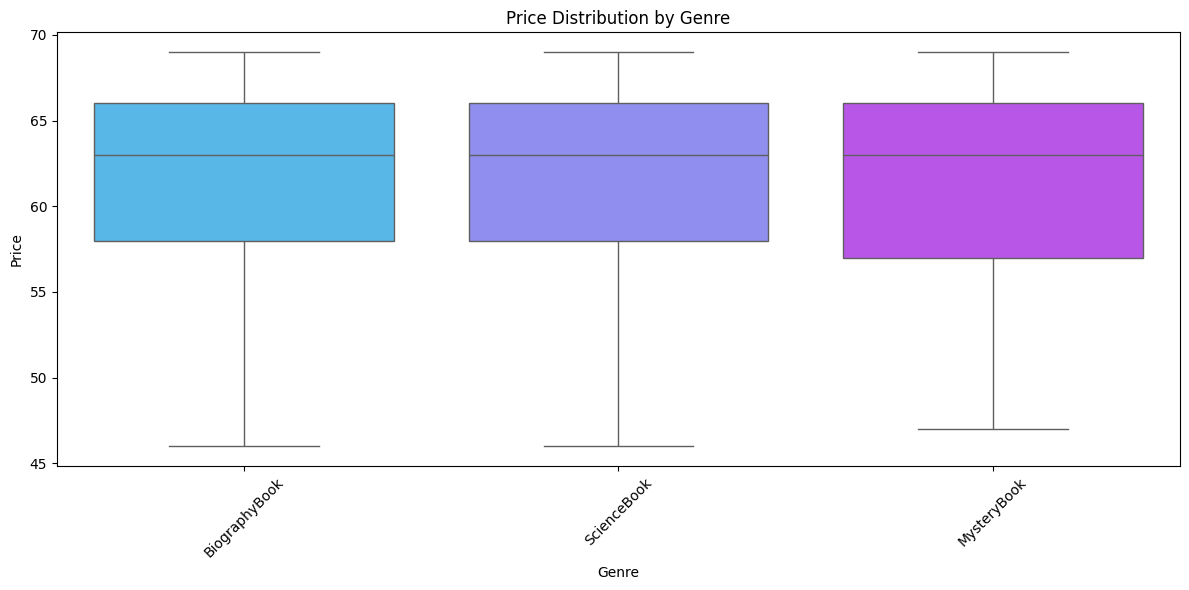

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,hue='genre', x='genre', y='price', palette='cool', showfliers=False, legend=False )
plt.title('Price Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Line Plot: Average reading time over time (grouped by date)**


---

**Data Overview**
*	The x-axis represents dates ranging from early 2022 to early 2023.
*	The y-axis represents the average reading time (in hours).

**Fluctuations in Reading Time**
*	The average reading time fluctuates between 20 and 37.5 hours.
*	There is a relatively stable trend from January to September 2022.
*	After September 2022, variability increases significantly, with multiple sharp spikes and drops.

**Peaks and Valleys**
*	Peaks: Represent days when books with longer average reading times were added to the catalog.
*	Valleys: Correspond to days with shorter average reading times, possibly due to the addition of shorter books.

**Possible Patterns**
*	The stable period earlier in the year suggests consistent addition of books with similar reading times.
*	Increased variability later may indicate diversification in the library's book catalog.

**Insights for Library Management**
*	Spikes in reading time might indicate the introduction of in-depth or lengthy books.
*	The library may explore balancing book categories to maintain consistent trends.



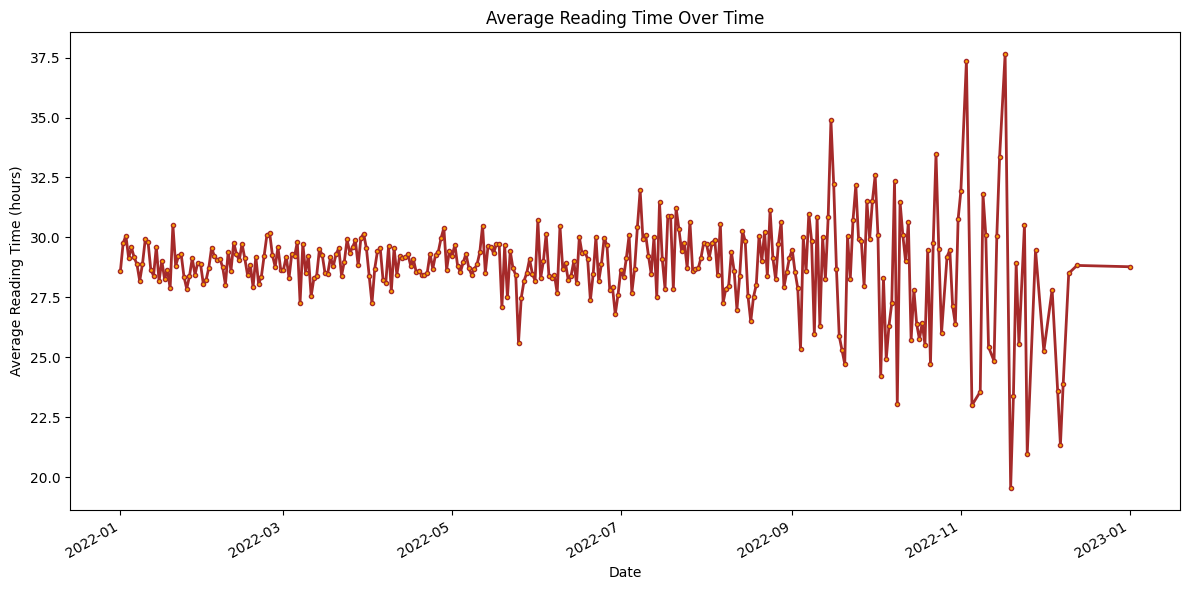

In [ ]:
time_data = data.groupby('date')['average_reading_time'].mean().dropna()

plt.figure(figsize=(12, 6))
time_data.plot(
    linewidth=2,  # Thicker line for better visibility
    marker='.',  # Add markers to each data point
    markerfacecolor='orange', # Highlight markers
    color='brown'
    )
plt.title('Average Reading Time Over Time')
plt.xlabel('Date')
plt.ylabel('Average Reading Time (hours)')
plt.tight_layout()
plt.show()

**4. Scatter Plot: Relationship between price and average reading time**


---
**Price Distribution**
*	The x-axis spans a range of prices from approximately $40 to $70.
*	Data points are evenly distributed along this range, suggesting a consistent representation of books across these prices.

**Average Reading Time**
*	The y-axis shows average reading times between 20 to 40 hours.
*	Most books have reading times clustered around 25–35 hours.

**Trend Between Price and Reading Time**
*	The scatter plot does not exhibit a strong linear correlation.
*	Both high and low prices appear across all ranges of reading times, indicating that price and average reading time are independent of each other.

**Outliers and Overlap**
*	There are no extreme outliers; most points are within a typical range.
*	Densely populated vertical lines suggest specific price points are more common in the dataset.



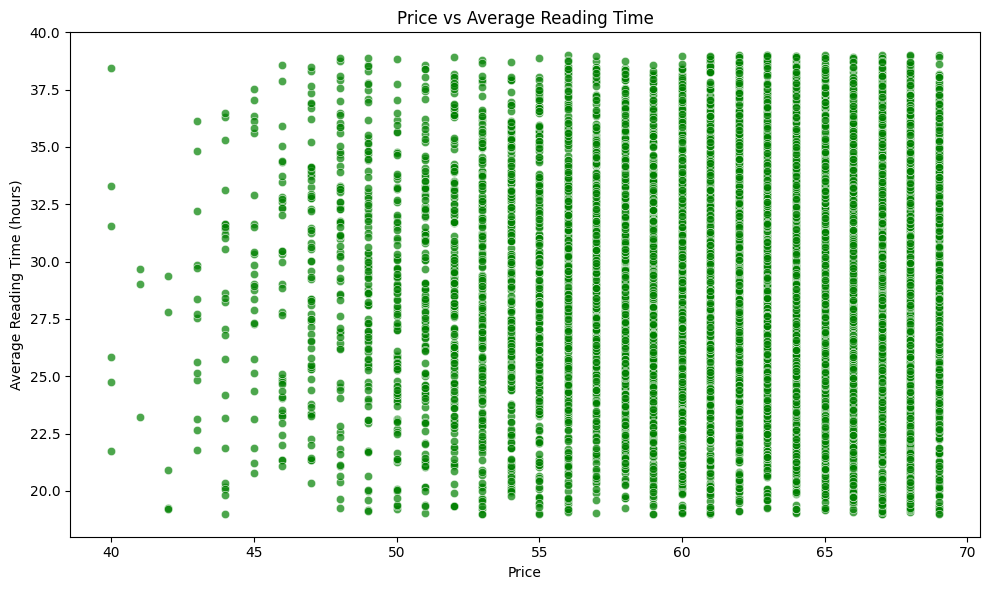

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='average_reading_time', alpha=0.7, color="green",)
plt.title('Price vs Average Reading Time')
plt.xlabel('Price')
plt.ylabel('Average Reading Time (hours)')
plt.tight_layout()
plt.show()

**5. Histogram: Distribution of ratings**


---
**Frequency Distribution**
*	Ratings are divided into intervals (bins).
*	The histogram shows the frequency (y-axis) of books for each rating interval (x-axis).

**Rating Trends**
*	The highest frequency is observed at 3.0, indicating most books are rated around 3.
*	Other significant peaks occur at 2.0 and 4.0, showing that readers tend to rate books moderately.
*	Very few books are rated extremely low (1.0) or high (5.0).

**Symmetry and Spread**
*	The distribution appears slightly skewed towards lower ratings, with fewer books rated 5.0 than 1.0.

**Reader Behavior**
*	Readers tend to rate books conservatively, avoiding extreme ratings unless the book strongly resonates or disappoints them.



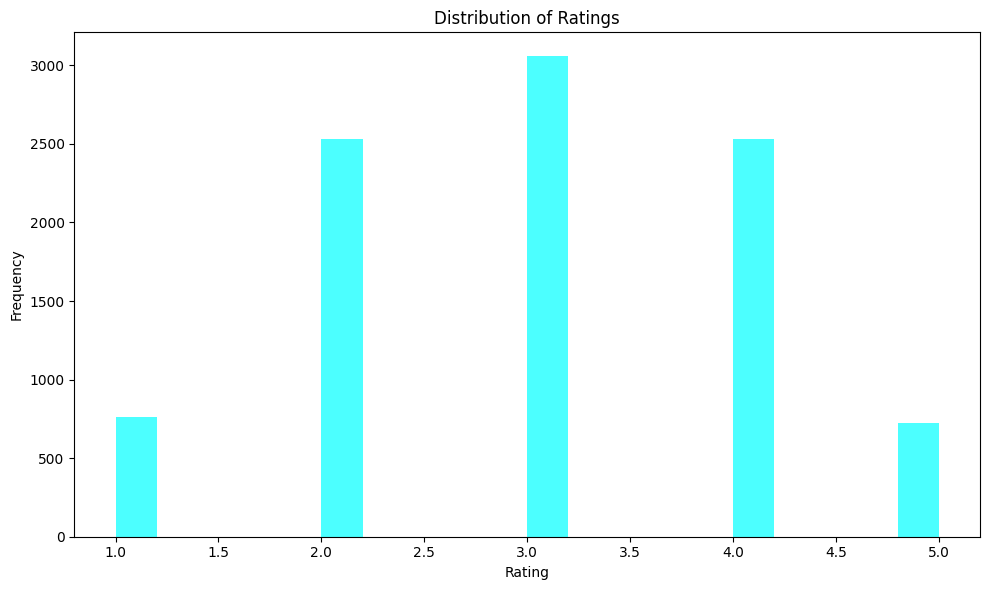

In [ ]:
plt.figure(figsize=(10, 6))
data['rating'].dropna().plot(kind='hist', bins=20, alpha=0.7, color='cyan')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**6. Pie Chart: Proportion of entries by type**


---
**Proportional Representation**
*	The pie chart represents the proportion of books in each genre.
*	Largest Segment: BiographyBook accounts for 78% of the total entries, indicating that it dominates the library’s catalog.
*	Moderate Segment: ScienceBook contributes 21.1%, showcasing its significance.
*	Smallest Segment: MysteryBook has the smallest proportion at 0.9%.

**Genre Popularity**
*	The distribution highlights that the catalog heavily focuses on non-fiction genres (BiographyBook and ScienceBook).
*	Fiction genres like MysteryBook are underrepresented.

**Library Specialization**
*	The library seems to prioritize books in non-fiction categories, catering to readers interested in biographies and science-related topics.




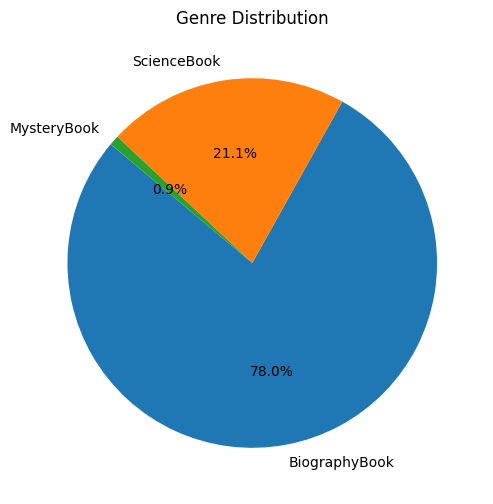

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts = data['genre'].value_counts()
genre_counts.plot(kind='pie', title='Genre Distribution', autopct='%1.1f%%', startangle=140)
plt.ylabel("")  # Remove y-axis label
plt.show()

**7. Heat Map: This code creates a heatmap that visualizes the frequency of occurrences between two categorical variables: genre and rating**


---

**Dominance of Genres**
*	BiographyBook dominates the dataset with significantly higher frequencies across all ratings, particularly in the middle range (ratings 2.0–4.0).

**Distribution of Ratings**
*	BiographyBook:
*	Peak frequency at rating 3.0 (2,362 occurrences).
*	Ratings are widely distributed, indicating diverse reader feedback.
*	ScienceBook:
*	Moderate representation across ratings, with a peak at rating 3.0 (665 occurrences).
*	Ratings are relatively balanced compared to BiographyBook.
*	MysteryBook:
*	Extremely low representation across all ratings.
*	Peak frequency at rating 3.0 (30 occurrences).

**Reader Preferences**
*	Readers tend to rate books in the middle range (3.0–4.0), regardless of genre.
*	Lower ratings (1.0) and higher ratings (5.0) are less frequent.

**Library Collection Insights**
*	The library focuses heavily on BiographyBook, which aligns with its popularity in ratings.
*	ScienceBook has a balanced presence but with room for growth.
*	MysteryBook needs more representation to attract diverse readers.


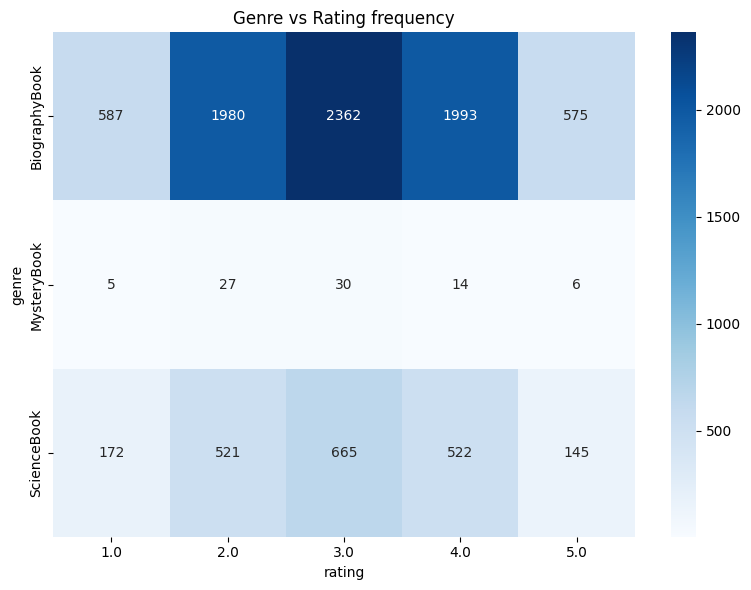

In [ ]:
# Create a frequency table (contingency table) for genre vs author
heatmap_data = pd.crosstab(data['genre'], data['rating'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')  # `fmt='d'` for integer formatting
plt.title('Genre vs Rating frequency')
plt.tight_layout()
plt.show()

**Conclusion**



1. Most resources belong to certain popular genres.

2. Ratings are generally clustered in a specific range (e.g., 3-5 stars).

3. There is no significant correlation between price and rating.

4. Genres like "ScienceBook" have longer reading times compared to others.


**Recommendation**



1. Ensure data completeness by minimizing missing values during collection.

2. Include additional metadata like author names, publication years, and publisher information.

3. Track resource availability or checkout statistics to analyze user preferences.

4. Add user feedback or review text for sentiment analysis.

5. Implement consistent data cleaning workflows for better future usability.